In [1]:
%load_ext autoreload
%autoreload 2
exec(open('init_notebook.py').read())
from matplotlib import pyplot as plt
from highD.HighD import HighD
from highD.Filter import Filter
from highD.Plot import Plot
from highD.Visualizer import GIF
from highD.helper import *

current working dirC:\Users\abjawad\Documents\GitHub\cogMod-driver-behavior-model\highd_tools


In [2]:
ids = ["01", "02"]
highD = HighD(ids, DATA_DIRECTORY)

dataset_id = 1
_, tMeta, tracks = highD.get_dataframe_tuple(dataset_id)
df = highD.get_combined_dataframe(dataset_id)
image = highD.get_image(dataset_id)

Loaded data and image for dataset 01.
Loaded data and image for dataset 02.


In [3]:
dfs = highD.get_combined_dataframes()
images = highD.get_images()

In [5]:
follow_meta = Filter.filter_vehicle_follow_scenario(df, 
                                      ego_type='Car', 
                                      preceding_type='Car',
                                      minDuration=5, 
                                      minStartDistance=50,
                                      maxStartDistance=100,
                                      removeStrictDistanceInc=True)

print(follow_meta.shape)
follow_meta.head()

Filtering vehicle follow scenario Car Car 5 50 100
total actors 1047, filtered actors 730, ratio 0.6972301814708691
total actors 1047, filtered actors 730, ratio 0.6972301814708691
total scenario 10, filtered scenario 5, ratio 0.5
(5, 8)


ego_id  preceding_id  start_frame  end_frame  duration  start_distance  \
2      50            47          994       1211      8.68       61.680066   
3     386           380         7878       8100      8.88       99.580025   
5     680           678        14277      14510      9.32       68.200188   
6     976           974        21037      21263      9.04       53.295855   
7    1041          1037        22357      22539      7.28       97.970590   

   max_distance  min_distance  
2     61.850137     50.781906  
3     99.580025     51.590035  
5     81.370325     68.200188  
6     56.650961     53.295855  
7    101.894064     97.970590

In [7]:
# select a random scenario
import numpy as np
# scenario_id = np.random.randint(0, len(follow_meta))
scenario_id = 0
print('scenario id ', scenario_id)
scenario_follow_meta = follow_meta.iloc[scenario_id]
ego_id = int(scenario_follow_meta['ego_id'])
preceding_id = int(scenario_follow_meta['preceding_id'])
start_frame = int(scenario_follow_meta['start_frame'])
end_frame = int(scenario_follow_meta['end_frame'])
print(ego_id, preceding_id, start_frame, end_frame)

scenario id  0
50 47 994 1211


start: 994, end: 1211 


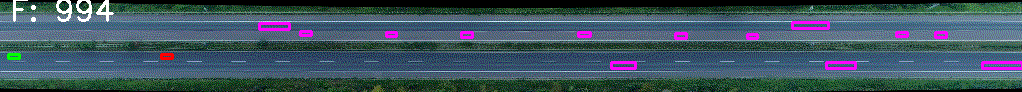

In [7]:
gif_path = GIF.create_gif_for_agent_with_target(image=image,
                                                tracks=df,
                                                agent_id=ego_id,
                                                target_id=preceding_id,
                                                output_dir=OUTPUT_DIRECTORY,
                                                showBufferScene=False)
display_animated_gif(gif_path)

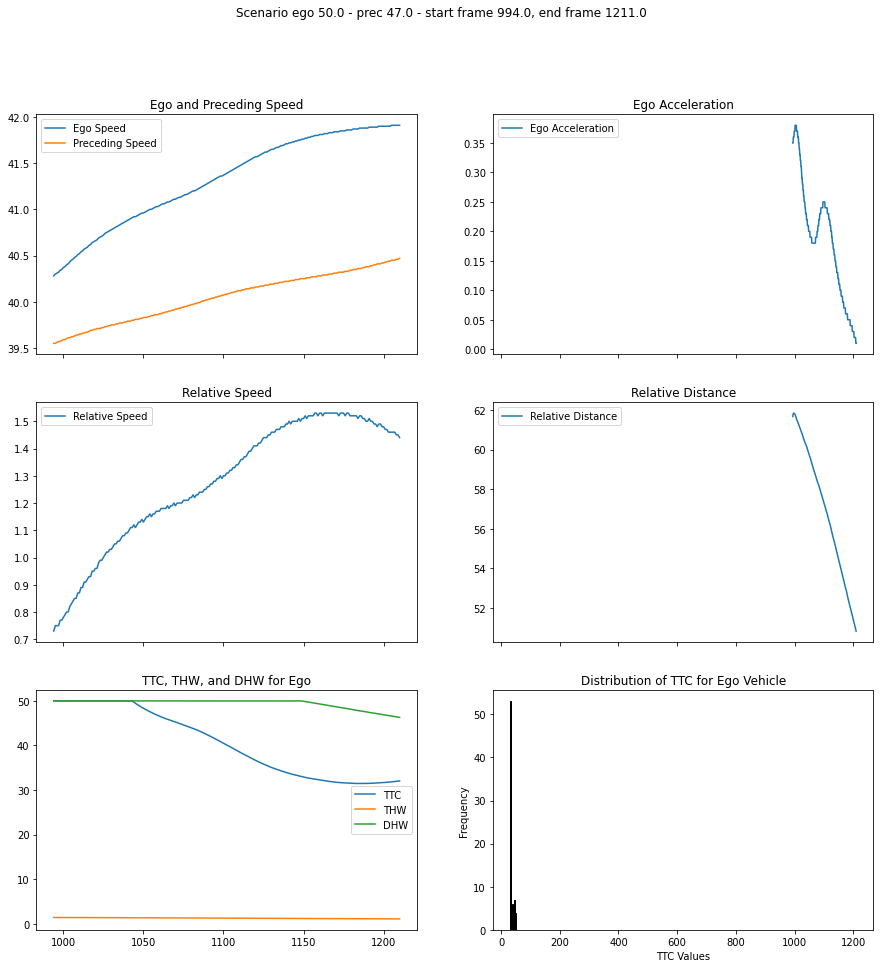

In [8]:
Plot.plot_agent_following_scenario(df, scenario_follow_meta, 00, 50)

In [ ]:
# import pandas as pd
# import plotly.subplots as sp
# import plotly.graph_objs as go

# def plot_xAcceleration_heatmap_scatter(dataframes, zmin=None, zmax=None, plot_width=100, plot_height=500):
#     # Step 0: Concatenate all DataFrames in the list
#     df_all = pd.concat(dataframes, ignore_index=True)

#     # Step 1: Create xAcceleration_tplus1 column
#     df_all['xAcceleration_tplus1'] = df_all['xAcceleration'].shift(-1)

#     # Step 2: Drop rows with missing values
#     df_all.dropna(subset=['xAcceleration_tplus1'], inplace=True)

#     # Step 3: Create a heatmap and scatter plot using plotly
#     heatmap_data = pd.crosstab(df_all['xAcceleration'], df_all['xAcceleration_tplus1'])

#     # Create subplots: 1 row, 2 columns
#     fig = sp.make_subplots(rows=1, cols=2)

#     # Add scatter plot to the first column
#     fig.add_trace(go.Scatter(
#         x = df_all['xAcceleration'],
#         y = df_all['xAcceleration_tplus1'],
#         mode = 'markers'
#     ), row=1, col=1)

#     # Add heatmap to the second column
#     fig.add_trace(go.Heatmap(
#         x=heatmap_data.columns,
#         y=heatmap_data.index,
#         z=heatmap_data.values,
#         zmin=zmin,
#         zmax=zmax,
#         colorbar=dict(title='Frequency'),
#         colorscale='Viridis'
#     ), row=1, col=2)
    
#     fig.update_layout(
#         title='Scatter plot and Heatmap of xAcceleration_t vs xAcceleration_t+1',
#         width=plot_width,
#         height=plot_height
#     )
    
#     fig.show()

# # Example usage:
# # Assuming you have a list of DataFrames named 'dataframes'
# plot_xAcceleration_heatmap_scatter([df], zmin=0, zmax=100, plot_width=1000, plot_height=500)


In [ ]:
# print(df.shape)
# filtered_df = df[df['id'] == ego_id]
# filtered_df = filtered_df[(filtered_df['frame'] >= start_frame) & (filtered_df['frame'] <= end_frame)]
# print(filtered_df.shape)
# plot_xAcceleration_heatmap([filtered_df], zmin=0, zmax=100, plot_width=900, plot_height=700)
# plot_xAcceleration_scatter([filtered_df], plot_width=900, plot_height=700)